<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Construct-a-Distribution" data-toc-modified-id="Construct-a-Distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Construct a Distribution</a></span></li><li><span><a href="#Put-an-Observed-Value-On" data-toc-modified-id="Put-an-Observed-Value-On-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Put an Observed Value On</a></span></li><li><span><a href="#Calculate-the-Probability-of-the-“Tail”" data-toc-modified-id="Calculate-the-Probability-of-the-“Tail”-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Calculate the Probability of the “Tail”</a></span></li><li><span><a href="#Collect-a-Sample" data-toc-modified-id="Collect-a-Sample-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Collect a Sample</a></span></li><li><span><a href="#Construct-a-Distribution-of-the-Sample-Mean" data-toc-modified-id="Construct-a-Distribution-of-the-Sample-Mean-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Construct a Distribution of the Sample Mean</a></span></li><li><span><a href="#Put-an-Observed-Mean-On" data-toc-modified-id="Put-an-Observed-Mean-On-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Put an Observed Mean On</a></span></li><li><span><a href="#Calculate-the-Probability-of-the-“Tail”-Again" data-toc-modified-id="Calculate-the-Probability-of-the-“Tail”-Again-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Calculate the Probability of the “Tail” Again</a></span></li><li><span><a href="#The-Sample-Mean-Distribution-Over-Sample-Size" data-toc-modified-id="The-Sample-Mean-Distribution-Over-Sample-Size-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>The Sample Mean Distribution Over Sample Size</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [2]:
np.random.seed(20180701)

# Construct a Distribution

Based on given assumptions, construct a distribution.

In [3]:
std_norm = sp.stats.norm(loc=0, scale=1)
std_norm_sample = std_norm.rvs(size=2718)  # just for viz

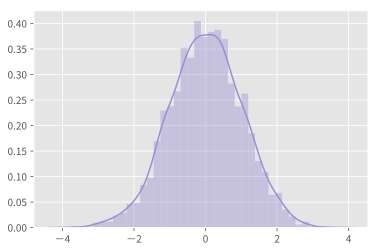

In [4]:
sns.distplot(std_norm_sample, color='C2')

# Put an Observed Value On

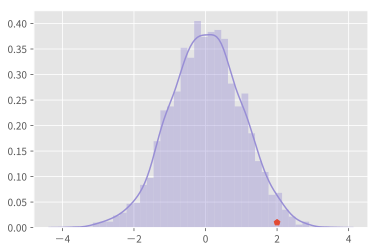

In [5]:
ov = 2
sns.distplot(std_norm_sample, color='C2')
plt.plot(ov, 0.01, 'p')

# Calculate the Probability of the “Tail”

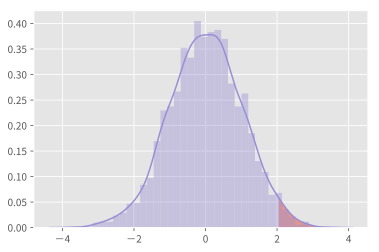

In [6]:
sns.distplot(std_norm_sample, color='C2')

ax = plt.gca()
kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, kde_y, where=kde_x>ov, alpha=0.5)

# plt.savefig('outputs/03_the_tail.png', bbox_inches='tight', dpi=600)

p-value  
= Given the distribution, the probability of more extreme values than the observed value.  
= P(more extreme values | the distribution)  
= P(the tail | the distribution)  
= P(X > x | std norm) in this case

The formal definitions:

p-value  
= $ P(X \geq x \mid H_0) $ if right tail event  
= $ P(X \leq x \mid H_0) $ if left tail event  
= $ 2\min\{P(X\leq x \mid H_0),P(X\geq x \mid H_0)\} $ if double tail event

In [7]:
# sf(x) -> P(X > x)
std_norm.sf(ov)

0.022750131948179195

In [8]:
# in other words, since the dist is std norm, the prob of values > 2 sigma is 0.0228

# Collect a Sample

In [9]:
# p: population's; we won't know them out of simulations
pm = 170
ps = 5
sample = sp.stats.norm.rvs(loc=pm, scale=ps, size=100, random_state=20180706)

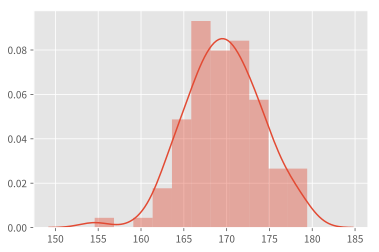

In [10]:
sns.distplot(sample)

# Construct a Distribution of the Sample Mean

In [11]:
sm = sample.mean()
ss = sample.std(ddof=1)
sem = sp.stats.sem(sample)  # standard error of the mean === std(mean of each sample(k, population))
assert sem == ss/np.sqrt(len(sample))
# see also: https://en.wikipedia.org/wiki/Variance#Sum_of_uncorrelated_variables_(Bienaym%C3%A9_formula)

# according to central limit theorem, sample mean ~ N(mu, sigma)
sm_dist = sp.stats.norm(loc=sm, scale=sem)
sm_dist_sample = sm_dist.rvs(size=2718)  # just for viz

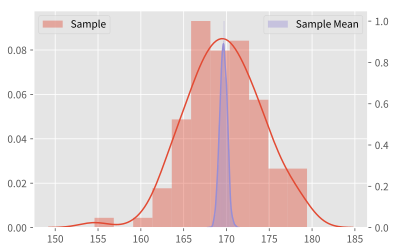

In [12]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.grid(False)

sns.distplot(sample, ax=ax1)
ax1.legend(['Sample'], loc='upper left')

sns.distplot(sm_dist_sample, color='C2', ax=ax2)
ax2.legend(['Sample Mean'], loc='upper right')

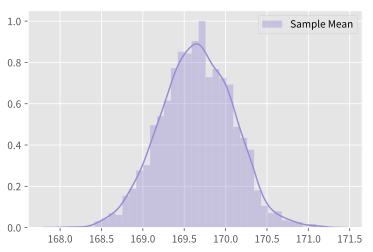

In [13]:
sns.distplot(sm_dist_sample, color='C2')
plt.legend(['Sample Mean'])

# Put an Observed Mean On

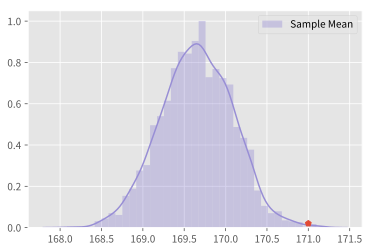

In [14]:
om = 171
sns.distplot(sm_dist_sample, color='C2')
plt.legend(['Sample Mean'])
plt.plot(om, 0.02, 'p')

# Calculate the Probability of the “Tail” Again

In [15]:
# https://en.wikipedia.org/wiki/Standard_score#Standardizing_in_mathematical_statistics
z_score = (om-sm)/sem
print(std_norm.sf(z_score))

0.0011020714084128012


# The Sample Mean Distribution Over Sample Size

In [16]:
def plot_by_sample_size(n):
    
    sample = sp.stats.norm.rvs(loc=pm, scale=ps, size=n, random_state=20180706)
    
    sm = sample.mean()
    sem = sp.stats.sem(sample)
    
    sm_dist = sp.stats.norm(loc=sm, scale=sem)
    sm_dist_sample = sm_dist.rvs(size=2718)
    
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax2.grid(False)

    sns.distplot(sample, ax=ax1)
    ax1.legend(['Sample'], loc='upper left')
    ax1.set_xlim((150, 190))

    sns.distplot(sm_dist_sample, color='C2', ax=ax2)
    ax2.legend(['Sample Mean'], loc='upper right')

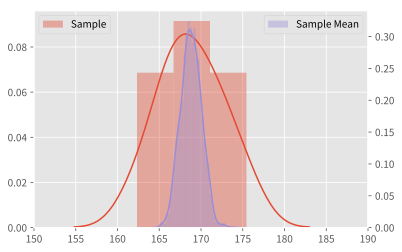

In [17]:
plot_by_sample_size(10)

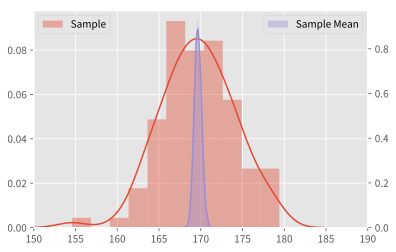

In [18]:
plot_by_sample_size(100)

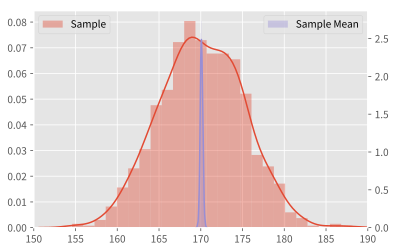

In [19]:
plot_by_sample_size(1000)

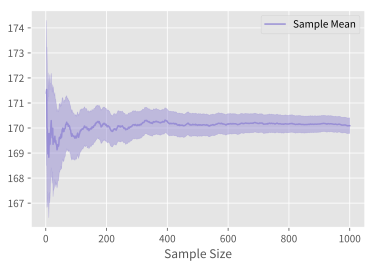

In [20]:
sample_1k = sp.stats.norm.rvs(loc=pm, scale=ps, size=1000, random_state=20180706)

# 1“+1” to avoid zero dof
first_n_v = np.arange(1+1, len(sample_1k)+1)
sm_v = [sample_1k[:i].mean() for i in first_n_v]
sem_v = [sp.stats.sem(sample_1k[:i]) for i in first_n_v]

sm_upper_v, sm_lower_v = sp.stats.norm.interval(loc=sm_v, scale=sem_v, alpha=0.95)

plt.fill_between(x=first_n_v, y1=sm_upper_v, y2=sm_lower_v, color='C2', alpha=0.5)
plt.plot(first_n_v, sm_v, color='C2')
plt.xlabel('Sample Size')
plt.legend(['Sample Mean'])

We illustrate a typical one-sample z-test in this notebook. Other hypothesis tests are similar. That'll be fun to visualize them by yourself.